In [1]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier as NN 
from sklearn.linear_model import LogisticRegression as lr
from sklearn.tree import DecisionTreeClassifier as dtc

import numpy as np
import pickle as pkl

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.datasets import make_moons, make_circles
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()

from sklearn import linear_model
from sklearn import datasets
from sklearn.svm import l1_min_c

from collections import defaultdict

from supp import plotdb, sample, barchart_insert

In [2]:
import warnings
warnings.filterwarnings('ignore')

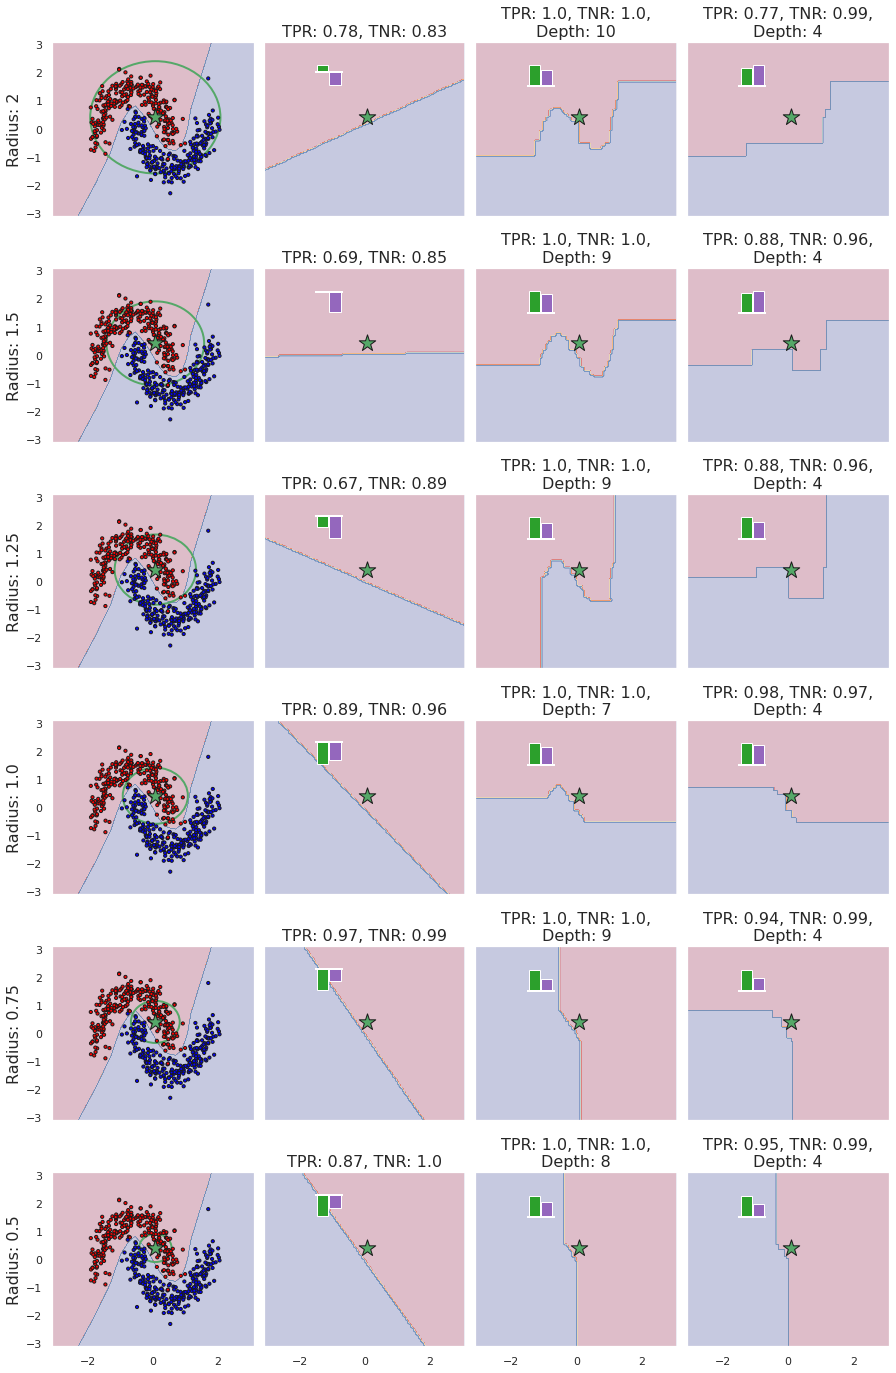

In [3]:
# plt.rcParams.update({'font.size': 16})

rs = [0.50, 0.75, 1., 1.25, 1.50, 2][::-1]  # 
nrs = len(rs)


x = np.array([0.075, 0.40]).reshape(1, -1)
# x = np.array([1.50, 0.]).reshape(1, -1)


fig, axes = plt.subplots(
    nrs, 4,
    figsize=(15, 4*nrs),
    sharex=True, sharey=True,
    gridspec_kw={
        "wspace": 0.05,
        "hspace": 0.30,
    }
)

X, y = make_moons(500, noise=0.15)
# X, y = make_circles(500, noise=0.15, factor=0.20)
X = X - np.mean(X, axis=0)
X = X / np.std(X, axis=0)

clf = NN(max_iter=5000).fit(X, y)

for ridx, r in enumerate(rs):
    xn = sample(x, r, 2000)
    yn = clf.predict(xn)
        
    axes[ridx, 0].set_ylabel(f'Radius: {r}', fontsize=16)
    for sidx, surrogate in enumerate([lr, dtc]):
        try:
            sclf = surrogate().fit(xn, yn)
        except ValueError as err:
            print(err)
            continue
            
        fig, ax = plotdb(xn, yn, sclf, ax=axes[ridx, sidx+1], resolution=0.05, plot_data=False)
        tn, fp, fn, tp = confusion_matrix(yn, sclf.predict(xn), labels=[0, 1]).ravel()
        
        title = f'TPR: {round(tp/(tp+fn), 2)}, TNR: {round(tn/(tn+fp), 2)}'
        if sidx in [1, 2]:
            title += f',\nDepth: {sclf.get_depth()}'
        ax.set_title(title, fontsize=16)
        
        if sidx == 0:
            fis = sclf.coef_
        else:
            fis = sclf.feature_importances_
        barplotsize = 0.80
        ins = ax.inset_axes([-1.5, 1.5, barplotsize, barplotsize], transform=ax.transData)
        ins.patch.set_alpha(0)
        barchart_insert(fis.ravel(), ins)
        
    ###
    sclf = surrogate(max_depth=4).fit(xn, yn)
    fig, ax = plotdb(xn, yn, sclf, ax=axes[ridx, 3], resolution=0.005, plot_data=False)
    fis = sclf.feature_importances_

    ins = ax.inset_axes([-1.5, 1.5, barplotsize, barplotsize], transform=ax.transData)
    ins.patch.set_alpha(0)
    barchart_insert(fis.ravel(), ins)
        
#     score = sclf.score(xn, yn)
    tn, fp, fn, tp = confusion_matrix(yn, sclf.predict(xn), labels=[0, 1]).ravel()
    ax.set_title(
        f'TPR: {round(tp/(tp+fn), 2)}, TNR: {round(tn/(tn+fp), 2)},\nDepth: {sclf.get_depth()}',
        fontsize=16,
    )

    
    ####
    fig, ax = plotdb(X, y, clf, ax=axes[ridx, 0], resolution=0.005)
    circle1 = plt.Circle(x.ravel(), r, color='g', linewidth=2, fill=False)
    ax.add_patch(circle1)
    
    for ii in range(4):
        axes[ridx, ii].scatter(x[0, 0], x[0, 1], marker='*', color='g', zorder=2, s=300, edgecolor='k')
#         axes[ridx, ii].set_xticklabels([])
#         axes[ridx, ii].set_yticklabels([])
plt.tight_layout()
# plt.savefig('example_rac_curve.png', dpi=200)

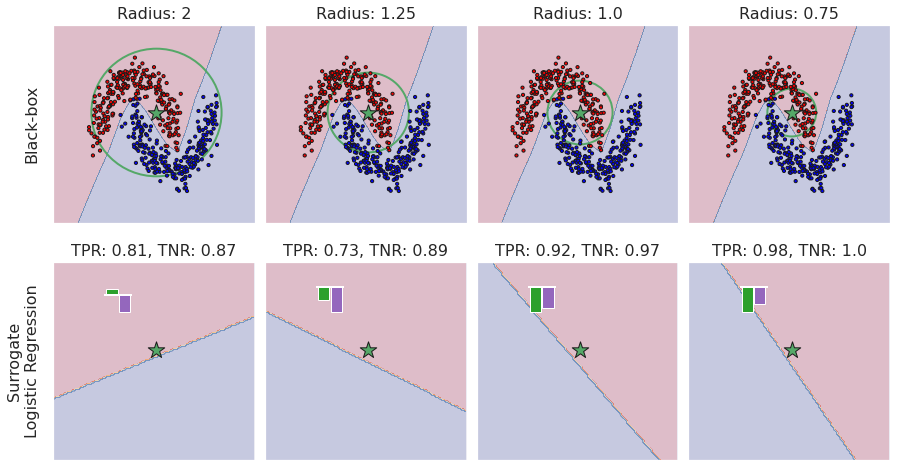

In [4]:
# plt.rcParams.update({'font.size': 16})

rs = [0.75, 1., 1.25, 2][::-1]  # 
nrs = len(rs)


x = np.array([0.075, 0.35]).reshape(1, -1)
# x = np.array([1.50, 0.]).reshape(1, -1)


fig, axes = plt.subplots(
    2, nrs,
    figsize=(15, 8),
    sharex=True, sharey=True,
    gridspec_kw={
        "wspace": 0.05,
        "hspace": 0.20,
    }
)

X, y = make_moons(500, noise=0.15)
# X, y = make_circles(500, noise=0.15, factor=0.20)
X = X - np.mean(X, axis=0)
X = X / np.std(X, axis=0)

clf = NN(max_iter=5000).fit(X, y)

for ridx, r in enumerate(rs):
    xn = sample(x, r, 2000)
    yn = clf.predict(xn)
        
    axes[0, ridx].set_title(f'Radius: {r}', fontsize=16)

    
    surrogate = lr
    try:
        sclf = surrogate().fit(xn, yn)
    except ValueError as err:
        print(err)
        continue

    fig, ax = plotdb(xn, yn, sclf, ax=axes[1, ridx], resolution=0.05, plot_data=False)
    tn, fp, fn, tp = confusion_matrix(yn, sclf.predict(xn), labels=[0, 1]).ravel()

    title = f'TPR: {round(tp/(tp+fn), 2)}, TNR: {round(tn/(tn+fp), 2)}'
    ax.set_title(title, fontsize=16)

    fis = sclf.coef_

    barplotsize = 0.80
    ins = ax.inset_axes([-1.5, 1.5, barplotsize, barplotsize], transform=ax.transData)
    ins.patch.set_alpha(0)
    barchart_insert(fis.ravel(), ins)
    
    ####
    fig, ax = plotdb(X, y, clf, ax=axes[0, ridx], resolution=0.005)
    circle1 = plt.Circle(x.ravel(), r, color='g', linewidth=2, fill=False)
    ax.add_patch(circle1)
    
    for ii in range(2):
        axes[ii, ridx].scatter(x[0, 0], x[0, 1], marker='*', color='g', zorder=2, s=300, edgecolor='k')
        axes[ii, ridx].set_xticklabels([])
        axes[ii, ridx].set_yticklabels([])
        
axes[0, 0].set_ylabel('Black-box', fontsize=16)
axes[1, 0].set_ylabel('Surrogate\nLogistic Regression', fontsize=16)

plt.tight_layout()
# plt.savefig('example_rac_curve_lr.png', dpi=200)

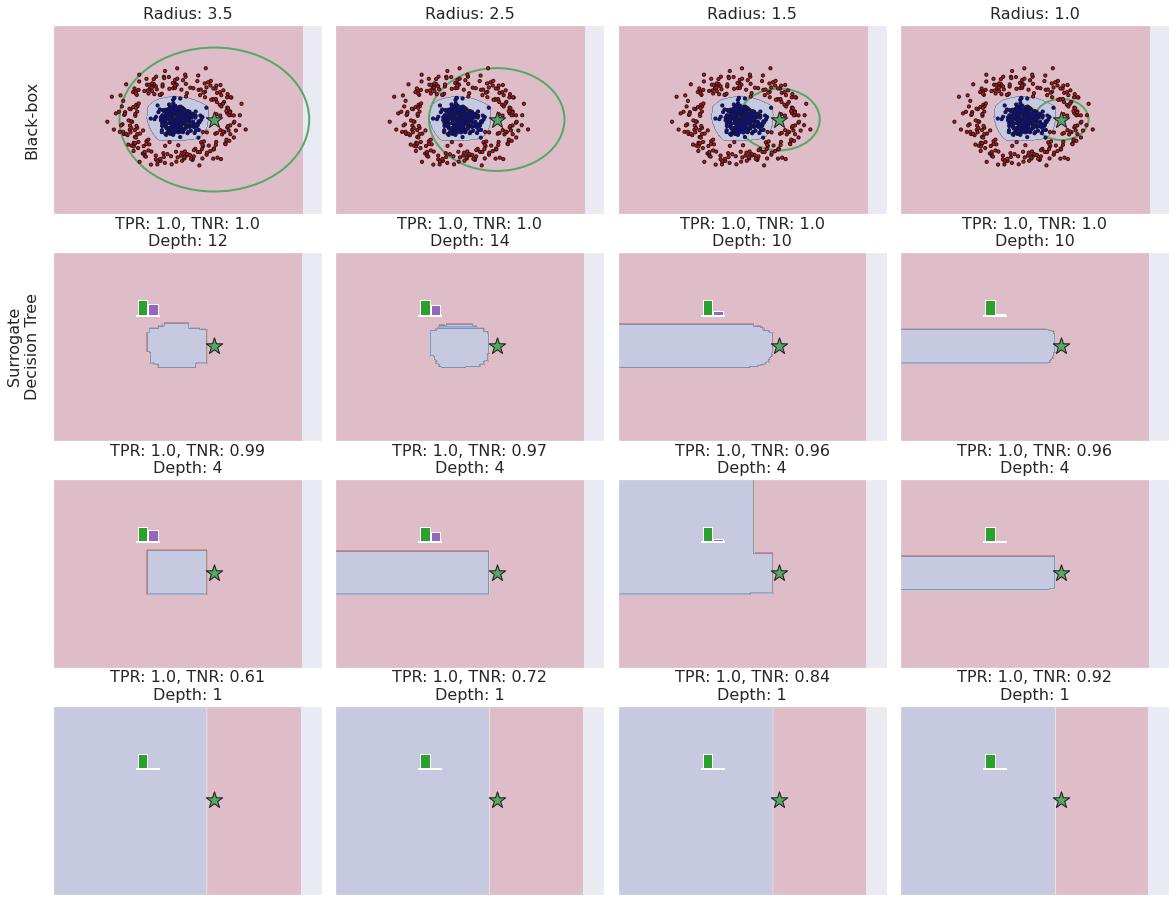

In [5]:
# plt.rcParams.update({'font.size': 16})

rs = [1., 1.50, 2.50, 3.50][::-1]  # 
nrs = len(rs)


x = np.array([1.35, 0.]).reshape(1, -1)
# x = np.array([1.50, 0.]).reshape(1, -1)


fig, axes = plt.subplots(
    4, nrs,
    figsize=(20, 16),
    sharex=True, sharey=True,
    gridspec_kw={
        "wspace": 0.05,
        "hspace": 0.20,
    }
)

# X, y = make_moons(500, noise=0.15)
X, y = make_circles(500, noise=0.15, factor=0.20)
X = X - np.mean(X, axis=0)
X = X / np.std(X, axis=0)

lim = 4.50
clf = NN(max_iter=5000).fit(X, y)

for ridx, r in enumerate(rs):
    xn = sample(x, r, 5000)
    yn = clf.predict(xn)
        
    axes[0, ridx].set_title(f'Radius: {r}', fontsize=16)

    
    surrogate = dtc
    try:
        sclf = surrogate(class_weight='balanced').fit(xn, yn)
    except ValueError as err:
        print(err)
        continue

    fig, ax = plotdb(xn, yn, sclf, ax=axes[1, ridx], resolution=0.05, plot_data=False, lim=lim)
    tn, fp, fn, tp = confusion_matrix(yn, sclf.predict(xn), labels=[0, 1]).ravel()

    title = f'TPR: {round(tp/(tp+fn), 2)}, TNR: {round(tn/(tn+fp), 2)}\nDepth: {sclf.get_depth()}'
    ax.set_title(title, fontsize=16)

    fis = sclf.feature_importances_
    barplotsize = 0.80
    ins = ax.inset_axes([-1.5, 1.5, barplotsize, barplotsize], transform=ax.transData)
    ins.patch.set_alpha(0)
    barchart_insert(fis.ravel(), ins)
    
    ###
    
    for ii, md in enumerate([4, 1]):
        surrogate = dtc
        try:
            sclf = surrogate(max_depth=md, class_weight='balanced').fit(xn, yn)
        except ValueError as err:
            print(err)
            continue

        fig, ax = plotdb(xn, yn, sclf, ax=axes[2+ii, ridx], resolution=0.05, plot_data=False, lim=lim)
        tn, fp, fn, tp = confusion_matrix(yn, sclf.predict(xn), labels=[0, 1]).ravel()

        title = f'TPR: {round(tp/(tp+fn), 2)}, TNR: {round(tn/(tn+fp), 2)}\nDepth: {sclf.get_depth()}'
        ax.set_title(title, fontsize=16)

        fis = sclf.feature_importances_
        barplotsize = 0.80
        ins = ax.inset_axes([-1.5, 1.5, barplotsize, barplotsize], transform=ax.transData)
        ins.patch.set_alpha(0)
        barchart_insert(fis.ravel(), ins)
    
    ####
    fig, ax = plotdb(X, y, clf, ax=axes[0, ridx], resolution=0.005, lim=lim)
    circle1 = plt.Circle(x.ravel(), r, color='g', linewidth=2, fill=False)
    ax.add_patch(circle1)
    
    for ii in range(4):
        axes[ii, ridx].scatter(x[0, 0], x[0, 1], marker='*', color='g', zorder=2, s=300, edgecolor='k')
        axes[ii, ridx].set_xticklabels([])
        axes[ii, ridx].set_yticklabels([])
        
axes[0, 0].set_ylabel('Black-box', fontsize=16)
axes[1, 0].set_ylabel('Surrogate\nDecision Tree', fontsize=16)

plt.tight_layout()
# plt.savefig('example_rac_curve_dtc.png', dpi=200)


In [6]:

x = np.array([0.075, 0.35]).reshape(1, -1)


X, y = make_moons(500, noise=0.15)
# X, y = make_circles(500, noise=0.15, factor=0.20)
X = X - np.mean(X, axis=0)
X = X / np.std(X, axis=0)

clf = NN(max_iter=5000).fit(X, y)
data = []
coefs_ = []
for ridx, r in enumerate(np.arange(0.50, 2.10, 0.05)[::-1]):
    xn = sample(x, r, 2000)
    yn = clf.predict(xn)
        
    surrogate = lr
    try:
        sclf = surrogate().fit(xn, yn)
    except ValueError as err:
        print(err)
        continue
        
    coefs_.append(sclf.coef_)
    score = sclf.score(xn, yn)
    data.append([r, score])

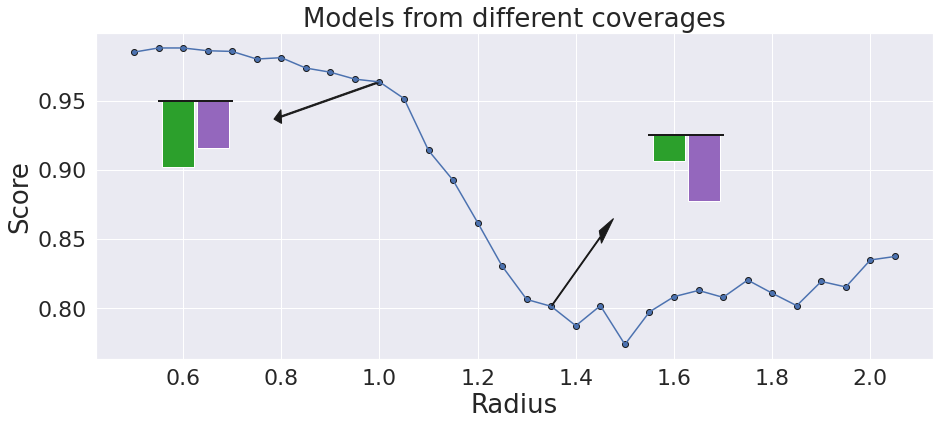

In [8]:
sns.set(font_scale=2)
d = np.array(data)
fig, ax = plt.subplots(figsize=(15, 6))
ax.scatter(d[:, 0], d[:, 1], marker='o', edgecolor='k')
ax.plot(d[:, 0], d[:, 1])

###
barplotsize = 0.05
ins = ax.inset_axes([0.55, 0.90, 0.15, barplotsize], transform=ax.transData)
ins.patch.set_alpha(0)
idx = -11
insax=barchart_insert(coefs_[idx].ravel(), ins, hide=True)
insax.spines['bottom'].set_color('k')
x, y = d[idx]
ax.arrow(x, y, -0.20, -0.025, color='k', width=1e-3, head_width=1e-2)

###
barplotsize = 0.05
ins = ax.inset_axes([1.55, 0.875, 0.15, barplotsize], transform=ax.transData)
ins.patch.set_alpha(0)
idx = 14
insax=barchart_insert(coefs_[idx].ravel(), ins, hide=True)
insax.spines['bottom'].set_color('k')
x, y = d[idx]
ax.arrow(x, y, 0.10, 0.05, color='k', width=1e-3, head_width=1e-2, head_length=3e-2)


ax.set_xlabel(f'Radius', fontsize=26)
ax.set_ylabel(f'Score', fontsize=26)
ax.set_title(f'Models from different coverages', fontsize=26)

plt.savefig('two_moons_different_coverages_pareto.png', dpi=200)

In [9]:

x = np.array([0.075, 0.35]).reshape(1, -1)


X, y = make_moons(500, noise=0.15)
# X, y = make_circles(500, noise=0.15, factor=0.20)
X = X - np.mean(X, axis=0)
X = X / np.std(X, axis=0)

clf = NN(max_iter=5000).fit(X, y)
data = []
allcoefs = []
allscores = []
reps = 500
for ridx, r in enumerate(np.arange(0.50, 2.10, 0.05)[::-1]):
    
    current_coefs = []
    current_scores = []
    
    for _ in range(reps):
        xn = sample(x, r, 200)
        yn = clf.predict(xn)

        surrogate = lr
        try:
            sclf = surrogate(max_iter=5000).fit(xn, yn)
        except ValueError as err:
            print(err)
            continue

        current_coefs.append(sclf.coef_)
        current_scores.append(sclf.score(xn, yn))
        
    allcoefs.append(current_coefs)
    allscores.append(current_scores)
    
    data.append([
        r,
        np.mean(np.array(current_coefs), axis=0),
        np.std(np.array(current_coefs), axis=0),
        np.mean(current_scores),
        np.std(current_scores),
   ])
    


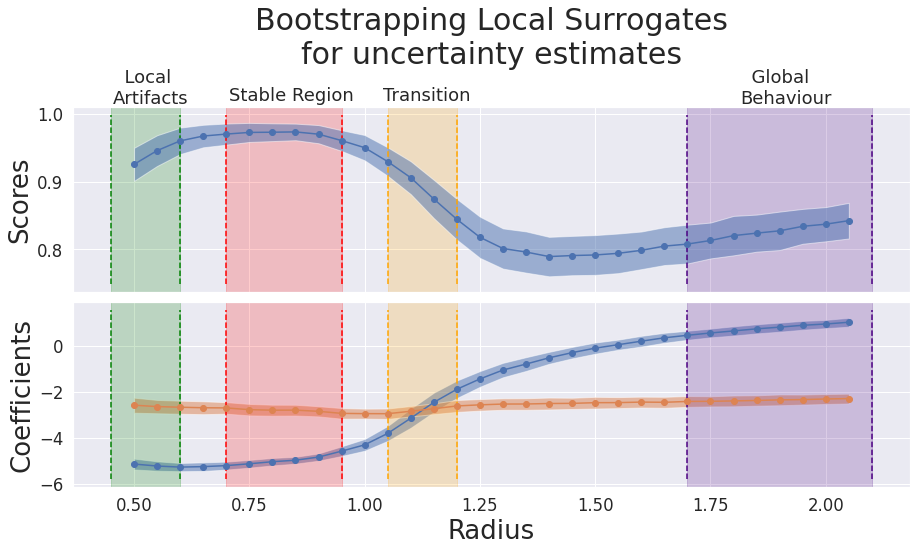

In [10]:
sns.set(font_scale=1.50)
rs, m_coefs, s_coefs, m_scores, s_scores = zip(*data)

fig, axes = plt.subplots(
    2, 1,
    figsize=(15, 7),
    sharex=True,
    gridspec_kw={
        "hspace": 0.05
    }
)

ax=axes[0]
m_scores = np.array(m_scores)
s_scores = np.array(s_scores)

ax.plot(rs, m_scores, marker='o')
ax.fill_between(rs, m_scores+s_scores, m_scores-s_scores, alpha=0.50, zorder=2)

# ax=axes[0]
m_coefs=np.vstack(m_coefs)
s_coefs=np.vstack(s_coefs)

for ii in range(2):
    ax=axes[1]
    ax.plot(rs, m_coefs[:, ii], marker='o', zorder=2)
    ax.fill_between(rs, m_coefs[:, ii]-s_coefs[:, ii], m_coefs[:, ii]+s_coefs[:, ii], alpha=0.50)
    
groups = [
    ['green', [0.45, 0.60]],
    ['red', [0.70, 0.95]],
    ['orange', [1.05, 1.20]],
    ['indigo', [1.70, 2.10]],
]

for ax in axes:
    ymin, ymax = ax.get_ylim()
    
    for color, xlocs in groups:
        for xloc in xlocs:
            ax.vlines(xloc, ymin, ymax, linestyle='--', color=color)

        ax.axvspan(xlocs[0], xlocs[1], alpha=0.20, color=color)
        
ax=axes[0]
ax.text(0.455, 1.015, '  Local\nArtifacts')
ax.text(0.705, 1.020, 'Stable Region')
ax.text(1.040, 1.020, 'Transition')
ax.text(1.815, 1.015, '  Global\nBehaviour')

# ax.plot(d[:, 0], yy)

axes[1].set_xlabel(f'Radius', fontsize=26)
axes[1].set_ylabel(f'Coefficients', fontsize=26)
axes[0].set_ylabel(f'Scores', fontsize=26)
axes[0].set_title(f'Bootstrapping Local Surrogates\nfor uncertainty estimates', fontsize=30, y=1.20)

plt.savefig('bootstrap_local_surrogates.png', dpi=200, bbox_inches='tight')

In [11]:
def _lassopath(X, y):
    cs = l1_min_c(X, y, loss='log') * np.logspace(1, 4, 10)
    clf = linear_model.LogisticRegression(penalty='l1',
                                          solver='liblinear',
                                          tol=1e-6, max_iter=int(1e6),
                                          warm_start=True,
                                          intercept_scaling=10.
                                         )
    coefs_ = []
    scores = []
    for c in cs:
        clf.set_params(C=c)
        clf.fit(X, y)
        scores.append(clf.score(X, y))
        coefs_.append(clf.coef_.ravel().copy())
    
    return cs, np.array(coefs_), np.array(scores)

In [12]:
X, yc = datasets.load_diabetes(return_X_y=True)

# X = X[:100, :]
# yc = yc[:100]

# X=X[:, :5]

X = X - np.mean(X, axis=0)
X = X / np.std(X, axis=0)

y = yc.copy()
m = np.median(yc)
y[y<m] = 0
y[y>m] = 1


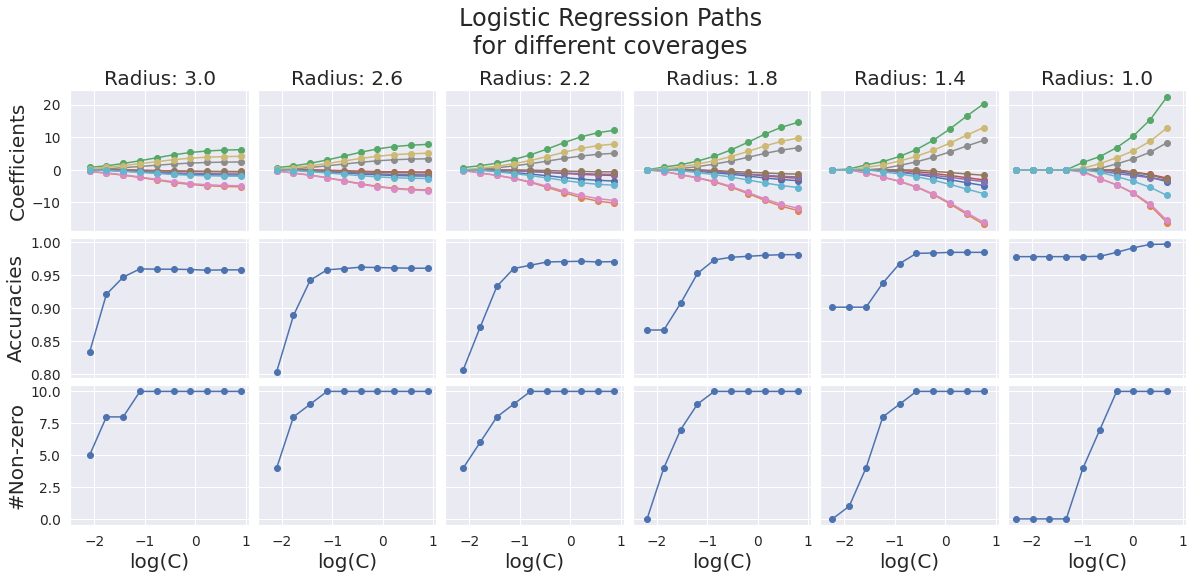

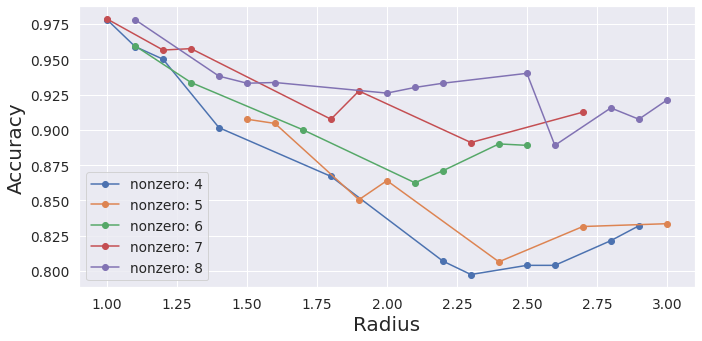

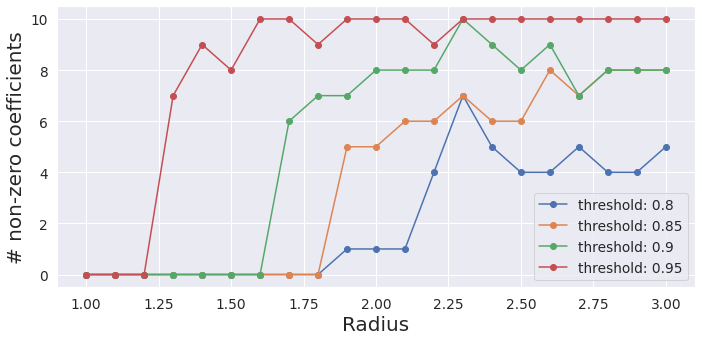

In [17]:
for idx in [10]:
    
    ##################################
    # collecting the coefs and scores
    ##################################
    
    x = X[idx, :].reshape(1, -1)
    data = []
    for ridx, r in enumerate(np.arange(1, 3.10, 0.10)[::-1]):
        xn = sample(x, r, 2000)
        yn = bb.predict(xn)

        try:
            out = _lassopath(xn, yn)
        except ValueError as err:
            print(err)
            continue
        data.append([r, out])
        
    #####################
    # plot lasso paths
    #####################
    
    s=4
    sns.set(font_scale=1.25)
    n = len(data[::s])
    fig, axes = plt.subplots(
        3, n,
        figsize=(20, 8),
        sharex=True, sharey='row',
        gridspec_kw={
            "wspace": 0.05,
            "hspace": 0.05,
        }
    )

    for ii, (r, (cs, coefs_, scores)) in enumerate(data[::s]):
        ax=axes[:, ii]
        ax[0].plot(np.log10(cs), coefs_, marker='o')
        ax[1].plot(np.log10(cs), scores, marker='o')

        ax[2].set_xlabel('log(C)', fontsize=20)
        ax[0].set_title(f'Radius: {round(r, 2)}', fontsize=20)

        nonzero = np.apply_along_axis(
            lambda x: np.linalg.norm(x, ord=0),
            1,
            coefs_
        )
        ax[2].plot(np.log10(cs), nonzero, marker='o')

    axes[0, 0].set_ylabel('Coefficients', fontsize=20)
    axes[1, 0].set_ylabel('Accuracies', fontsize=20)
    axes[2, 0].set_ylabel('#Non-zero', fontsize=20)

    fig.suptitle('Logistic Regression Paths\nfor different coverages', fontsize=24, position=(0.50, 1.025))    
    plt.tight_layout()
    plt.savefig(f'lasso_paths_idx_{idx}.png', dpi=200, bbox_inches='tight')
    
    #####################
    # nonzero plots
    #####################
    
    nds = defaultdict(lambda: [])
    for ii, (r, (cs, coefs_, scores)) in enumerate(data):
        nonzero = np.apply_along_axis(
            lambda x: np.linalg.norm(x, ord=0),
            1,
            coefs_
        )

        for v in [4, 5, 6, 7, 8]:
            jj = np.where(nonzero==v)[0]
            if len(jj) == 0:
                continue
    #         print(round(r, 2), nonzero, jj, scores[jj])
            nds[v].append([r, scores[jj[0]]])

    fig, axes = plt.subplots(1, 1, figsize=(10, 5), sharex=True, sharey=True)
    for l, k in enumerate(sorted(nds.keys())):
        nd = nds[k]
        ax=axes
        nd=np.array(nd)
        ax.plot(nd[:, 0], nd[:, 1], marker='o', label=f'nonzero: {k}')
    ax.set_xlabel(f'Radius', fontsize=20)
    ax.set_ylabel(f'Accuracy', fontsize=20)
    ax.legend()
    plt.tight_layout()
    plt.savefig(f'nonzero_plot_idx_{idx}.png', dpi=200)
    
                
    #####################
    # accuracy plots
    #####################
    
    nds = defaultdict(lambda: [])
    for ii, (r, (cs, coefs_, scores)) in enumerate(data):
        nonzero = np.apply_along_axis(
            lambda x: np.linalg.norm(x, ord=0),
            1,
            coefs_
        )

        th = 0.925
        for th in [0.80, 0.85, 0.90, 0.95]:
            jj = np.where(scores>=th)[0]
            if len(jj) == 0:
                continue

            nds[th].append([r, nonzero[jj[0]]])


    fig, axes = plt.subplots(1, 1, figsize=(10, 5), sharex=True, sharey=True)
    for l, k in enumerate(sorted(nds.keys())):
        nd = nds[k]
        ax=axes
        nd=np.array(nd)
        ax.plot(nd[:, 0], nd[:, 1], marker='o', label=f'threshold: {k}')
        
    ax.set_xlabel(f'Radius', fontsize=20)
    ax.set_ylabel(f'# non-zero coefficients', fontsize=20)
    ax.legend()
    plt.tight_layout()
    plt.savefig(f'accuracy_plots_idx_{idx}.png', dpi=200)
    
